# Algorithmic Trading for live stock prices

In [1]:
import pandas as pd
import datetime
pd.core.common.is_list_like =  pd.api.types.is_list_like
import pandas_datareader as pdr
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
import yfinance as fyf
from pandas_datareader import data as pdr
# fyf.pdr_override('AAPL')
end_date = datetime.datetime.today()
start_date = end_date - datetime.timedelta(365)

In [3]:
# option=['x','x','x','x']
# choice = input("Want to add companies? (Y or N) - ")
# if (choice=='Y'):
#     option[0] = input("Add company code here to add: ")
#     option[1] = input("Company name: ")
# choice = input("Want to remove companies? (Y or N) - ")
# if (choice=='Y'):
#     option[2] = input("Add company code here to remove: ")
#     option[3] = input("Company name: ")

#INPUT PROGRAM

In [4]:
tickers = ['AAPL', 'MSFT','RS','UL','HINDUNILVR.NS','TSLA','INFY']
names=['Apple','Microsoft','Reliance','Unilever','H.U.L.','Tesla','Infosys']

# if(option[0]!='x'):
#     tickers.append(option[0])
#     names.append(option[1])
# elif(option[2]!='x'):
#     tickers.remove(option[2])
#     names.remove(option[3])

file=[]
for i in range(len(tickers)):
    string='company'+str(i)+'.csv'
    file.append(string)


obj=[]
company=[]

for i in range(len(tickers)):
    obj.append(fyf.download(tickers[i], start=start_date, end=end_date))
    obj[i].to_csv(file[i])
    company.append(pd.read_csv(file[i], header=0, parse_dates=True))
    company[i]["Date"] = pd.to_datetime(company[i]["Date"])

# apple=company[0]
# mcrsft=company[1]
# reliance=company[2]
# unlvr=company[3]
# hul=company[4]
# tesla=company[5]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
print(company[3]) #Unilever

          Date       Open       High        Low      Close  Adj Close   Volume
0   2020-08-03  61.720001  61.919998  61.040001  61.250000  59.195652   794300
1   2020-08-04  60.779999  61.750000  60.689999  61.750000  59.678883   773100
2   2020-08-05  62.080002  62.250000  61.139999  61.180000  59.128002   698400
3   2020-08-06  60.299999  60.650002  60.279999  60.419998  58.844589   930100
4   2020-08-07  59.759998  59.889999  59.419998  59.689999  58.133625   726300
..         ...        ...        ...        ...        ...        ...      ...
246 2021-07-26  56.200001  56.349998  55.709999  55.740002  55.740002  2227700
247 2021-07-27  56.119999  56.549999  56.090000  56.459999  56.459999  2228800
248 2021-07-28  56.330002  56.650002  56.220001  56.599998  56.599998  2937000
249 2021-07-29  57.090000  57.740002  57.080002  57.520000  57.520000  2401900
250 2021-07-30  57.959999  58.040001  57.509998  57.529999  57.529999  1896000

[251 rows x 7 columns]


## Moving Averages 10, 20 & 50
Calculating and adding 3 moving averages columns

In [6]:
for i in range(len(company)):
    company[i]['MovingAverage5'] = company[i].iloc[:,4].rolling(window=5).mean().round(4)
    company[i]['MovingAverage10'] = company[i].iloc[:,4].rolling(window=10).mean().round(4)
    company[i]['MovingAverage20'] = company[i].iloc[:,4].rolling(window=20).mean().round(4)
    company[i]['MovingAverage50'] = company[i].iloc[:,4].rolling(window=50).mean().round(4)

## Moving Averages 10, 20 & 50
Calculating and adding 3 moving averages columns

In [7]:
print(company[0]) #Apple

          Date        Open        High         Low       Close   Adj Close  \
0   2020-08-03  108.199997  111.637497  107.892502  108.937500  108.208389   
1   2020-08-04  109.132500  110.790001  108.387497  109.665001  108.931015   
2   2020-08-05  109.377502  110.392502  108.897499  110.062500  109.325851   
3   2020-08-06  110.404999  114.412498  109.797501  113.902496  113.140152   
4   2020-08-07  113.205002  113.675003  110.292503  111.112503  110.567833   
..         ...         ...         ...         ...         ...         ...   
246 2021-07-26  148.270004  149.830002  147.699997  148.990005  148.990005   
247 2021-07-27  149.119995  149.210007  145.550003  146.770004  146.770004   
248 2021-07-28  144.809998  146.970001  142.539993  144.979996  144.979996   
249 2021-07-29  144.690002  146.550003  144.580002  145.639999  145.639999   
250 2021-07-30  144.380005  146.330002  144.110001  145.860001  145.860001   

        Volume  MovingAverage5  MovingAverage10  MovingAverage2

## RSI Calculation

### RSI 1
Gain & Loss( = Difference in Closing Values (AL is taken in positive)

Average Gain(AL) & Average Loss(AL) = Average Gain/Average loss for a period of 14 days

$$RSI_1=100-\bigg(\frac{100}{1+\frac{AG}{AL}}\bigg)$$

In [8]:
def rsi1(data):
    Close=data['Close']
    Open=data['Open']
    AG=np.zeros_like(Open)
    AL=np.zeros_like(Open)
    RSI1=np.zeros_like(Open)
    
    for i in range(0,len(Open)-14):
        for j in range(i,i+14):
            gain=Close[j+1]-Close[j]
            if(gain>=0):
                AG[i+14]+=gain
            else:
                AL[i+14]+=-gain
        
        if(AL[i+14]==0):
            RSI1[i+14]=100
        else:
            RSI1[i+14]=100-(100/(1+((AG[i+14]/AL[i+14]))))
    
    n=0
    for i in RSI1:
        if(i==0):
            RSI1[n]=float('NaN')
        n+=1
    
    return([RSI1,AG,AL])

### RSI 2
For smoothening the RSI1 values

Gain & Loss( = Difference in Closing Values (AL is taken in positive)

Average Gain(AL) & Average Loss(AL) = Average Gain/Average loss for a period of 14 days = (Gain *or* Loss)/14 

Previous Average Gain(PAG) & Previous Average Loss(PAL) = Average Gain/Average Loss in the previous 14 days

$$RSI_1=100-\bigg(\frac{100}{1+\frac{13PAG+AG}{13PAL+AL}}\bigg)$$

In [9]:
def rsi2(data):
    Close=data['Close']
    Open=data['Open']
    AG2=np.zeros_like(Open)
    AL2=np.zeros_like(Open)
    RSI2=np.zeros_like(Open)
    
    PAG=rsi1(data)[1]
    PAL=rsi1(data)[2]
    
    for i in range(14,len(Open)-14):
        for j in range(i,i+14):
            gain=Close[j+1]-Close[j]
            if(gain>=0):
                AG2[i+14]+=gain
            else:
                AL2[i+14]+=-gain
         
        AG2[i+14]/=14
        AL2[i+14]/=14
        PAG[i]/=14
        PAL[i]/=14
        
        if((PAL[i]*13)+AL2[i+14]==0):
            RSI2[i]=100
        else:
            RSI2[i]=100-(100/(1+(((PAG[i]*13)+AG2[i+14])/((PAL[i]*13)+AL2[i+14]))))
    
    n=0
    for i in RSI2:
        if(i==0):
            RSI2[n]=float('NaN')
        n+=1
    return(RSI2)

In [10]:
print(rsi2(company[0]))

[        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan 72.54859071 73.30028796 70.91509743 68.23201605
 71.05911964 68.34451085 80.38278663 81.1640206  72.59820772 55.97575678
 56.78207128 47.35197201 51.2928974  45.72292307 37.80511865 39.55466708
 40.8823387  36.29516785 36.37771294 34.38885215 33.07813901 29.2156047
 28.22704838 36.68382841 41.5447899  52.9223032  45.99352218 53.36914683
 56.69206866 47.04500874 51.0832369  51.51461884 56.24234434 60.91314578
 59.70505085 64.07839373 66.77957027 66.00169781 61.51746407 55.9951773
 52.9284297  52.25250998 50.01523836 54.58948906 48.10589728 54.13862283
 53.42601151 44.98105972 47.82830206 26.72639625 29.63380863 32.73478365
 41.59309704 49.69590665 53.79052863 48.57818563 49.44701177 55.48873809
 56.16540159 56.12686641 55.54456579 63.71916669 55.24516647 72.22483574
 68.68822555 57.86005757 52.63229284 44.62267932 47.0

## Plotting function
To plot the Stock Prices with time

To plot the RSI values just below it

In [11]:
def plotting(data,name,num): 
    import matplotlib.dates as mdates
    plt.figure(num,figsize=(15,10))
    plt.grid()
    plt.plot(data['Date'],data['Close'],linewidth=3)
    plt.plot(data['Date'],data['MovingAverage5'])
    plt.plot(data['Date'],data['MovingAverage10'])
    plt.plot(data['Date'],data['MovingAverage20'])
    plt.plot(data['Date'],data['MovingAverage50'])
    plt.legend(['Stock Prices','MovAvg5','MovAvg10','MovAvg20','MovAvg50'])
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title('%s Stocks'%name)
    #plt.xticks(rotation='horizontal')    
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    plt.gcf().autofmt_xdate()

    plt.figure(num+1,figsize=(15,6))
    plt.grid()
    plt.plot(data['Date'],rsi1(data)[0],'y--')
    plt.plot(data['Date'],rsi2(data),'b',linewidth=3)
    plt.axhline(y=70,color='red',linestyle=':',linewidth=2)
    plt.axhline(y=50,linestyle=':',linewidth=0.5)
    plt.axhline(y=30,color='green',linestyle=':',linewidth=2)
    plt.legend(['RSI1','RSI2','Overbought','Oversold'])
    plt.xlabel('Date')
    plt.ylabel('RSI value')
    plt.ylim(0,100)
    plt.title('RSI Plots')
    #plt.xticks(rotation='horizontal')
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    plt.gcf().autofmt_xdate()

In [12]:
def printValue(data,days,roundoff,name):
    total=len(data['Date'])
    if days>14:
        print('RSI1 Value for',name,'on %s:'%data['Date'][total-days],rsi1(data)[0][-days].round(roundoff))
        print('RSI2 Value on %s:'%data['Date'][total-days],rsi2(data)[-days].round(roundoff))
    else:
        print('RSI Value for',name,'on %s:'%data['Date'][total-days],rsi1(data)[0][-days].round(roundoff))

## Decision Maker Algorithm

In [13]:
def decision(rsi,ma5,ma10,ma20,ma50):
    string='DECISION = '
    
    if(rsi<30 and ma5<ma50 and ma10<ma50 and ma20<ma50):
        string+='STRONG BUY!'
    elif((rsi<30 and ma10<ma50) or (ma10<ma50 and ma50>ma20)):
        string+='Buy'
    elif(rsi>70 and ma20>ma50 and 3*np.abs(ma10-ma5)<np.abs(ma50-ma5) and np.abs(ma50-ma20)>np.abs(ma20-ma5)):
        string+='STRONG SELL!'
    elif((rsi>70 and ma10>ma50) or (3*np.abs(ma10-ma5)<np.abs(ma50-ma5) and ma20>ma50)):
        string+='Sell'
    else:
        string+='Neutral'
    print(string)

## Decision for today's stock prices

In [14]:
for i in range(len(company)):
    length = len(company[i])-1
    decision(rsi1(company[i])[0][length],company[i]['MovingAverage5'][length],company[i]['MovingAverage10'][length],company[i]['MovingAverage20'][length],company[i]['MovingAverage50'][length])

DECISION = Sell
DECISION = Sell
DECISION = Buy
DECISION = Buy
DECISION = Buy
DECISION = Sell
DECISION = STRONG SELL!


## RSI and stock prices graphs

RSI Value for Apple on 2021-07-30 00:00:00: 52.8
DECISION = Sell


RSI Value for Microsoft on 2021-07-30 00:00:00: 63.24
DECISION = Sell


RSI Value for Reliance on 2021-07-30 00:00:00: 57.69
DECISION = Buy


RSI Value for Unilever on 2021-07-30 00:00:00: 38.83
DECISION = Buy


RSI Value for H.U.L. on 2021-07-30 00:00:00: 22.99
DECISION = Buy


RSI Value for Tesla on 2021-07-30 00:00:00: 50.52
DECISION = Sell


RSI Value for Infosys on 2021-07-30 00:00:00: 70.5
DECISION = STRONG SELL!




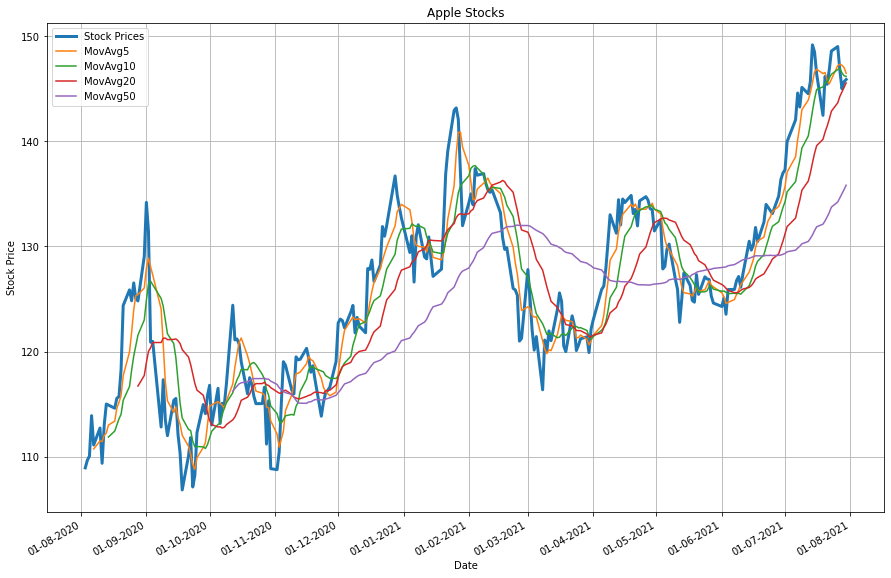

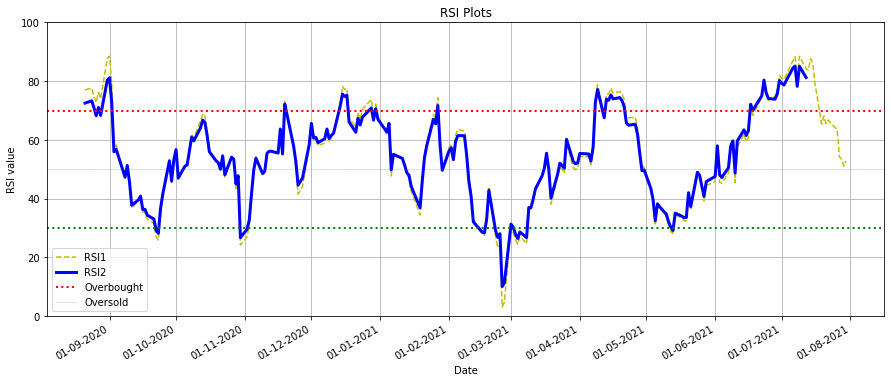

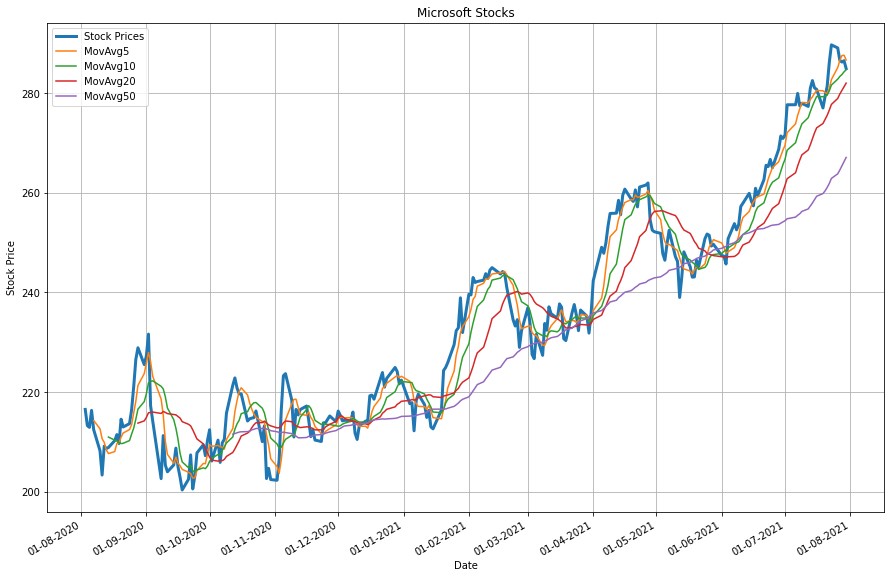

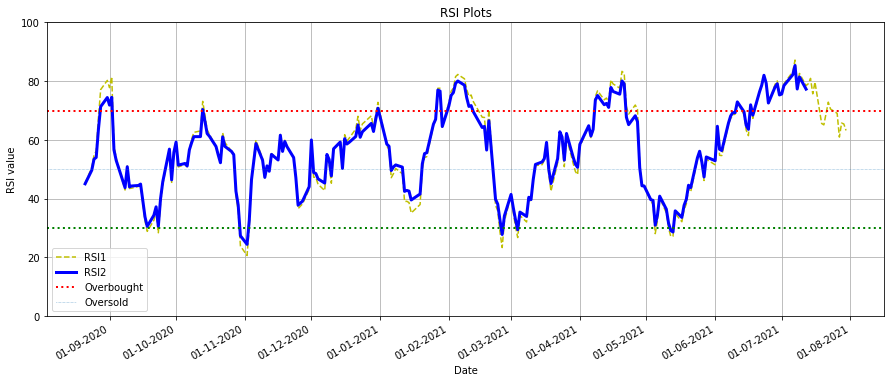

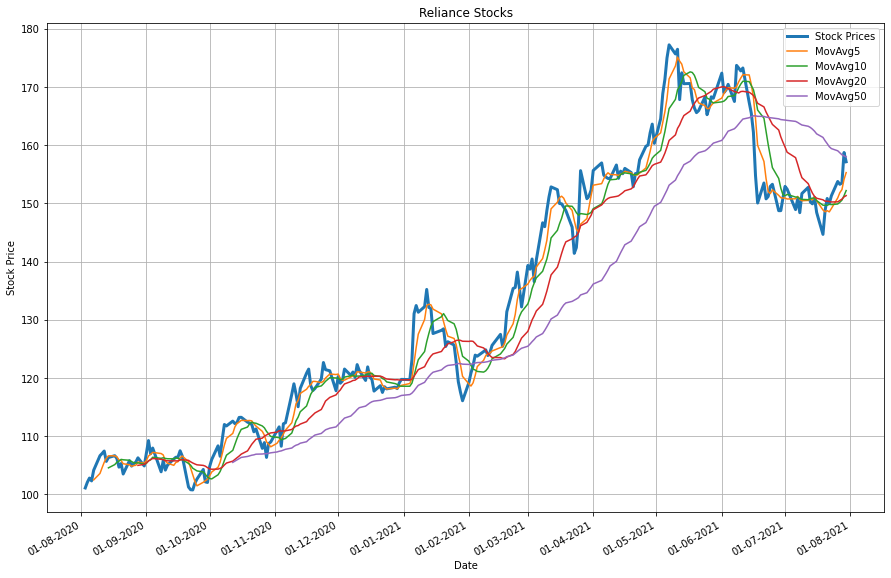

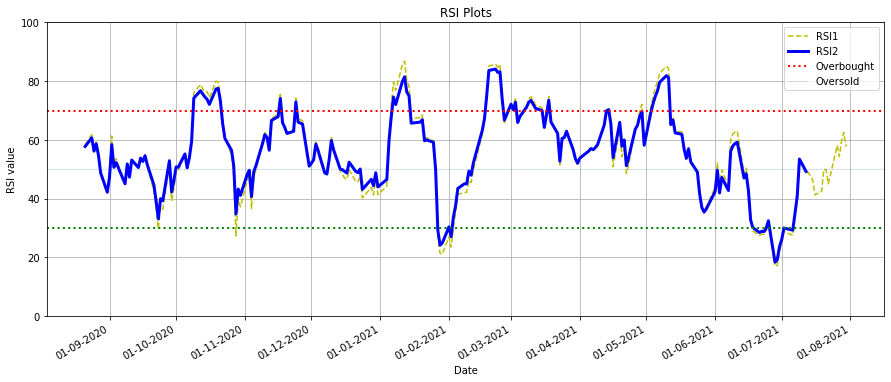

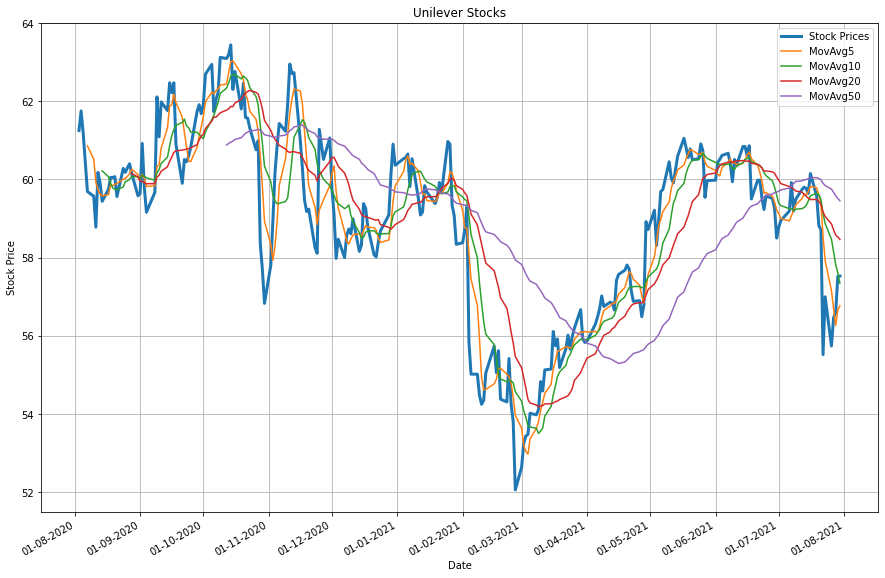

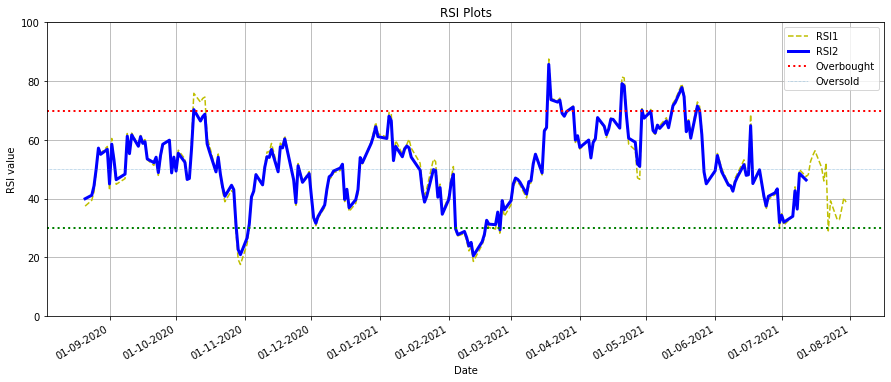

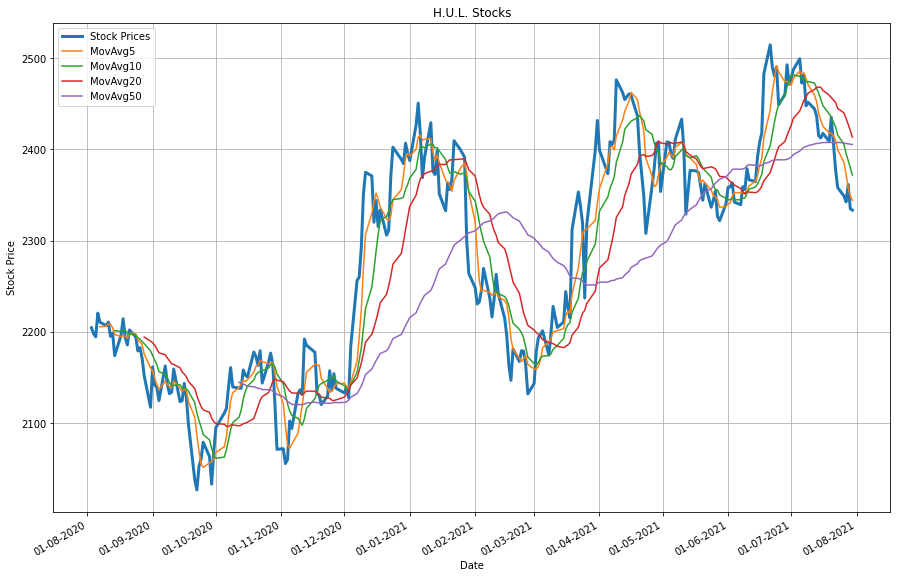

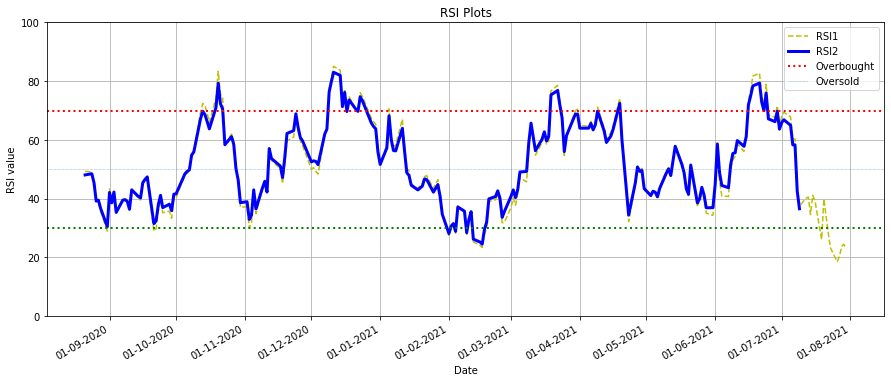

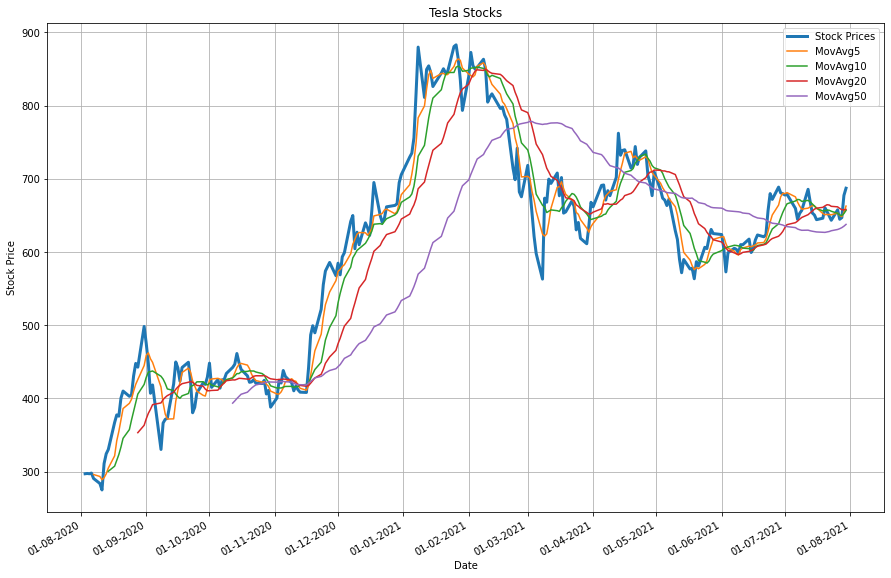

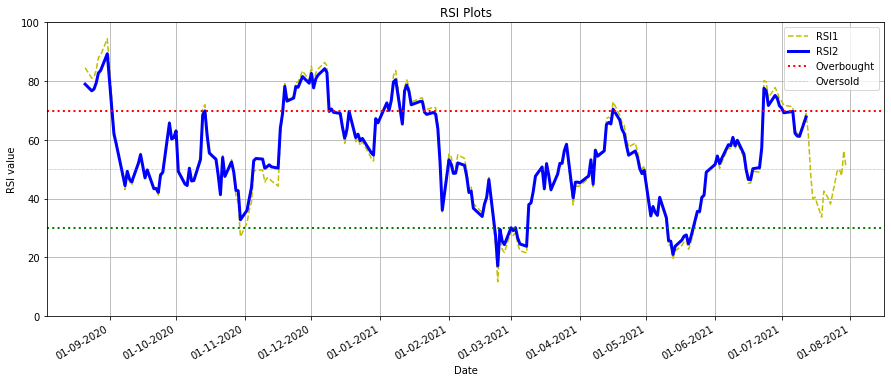

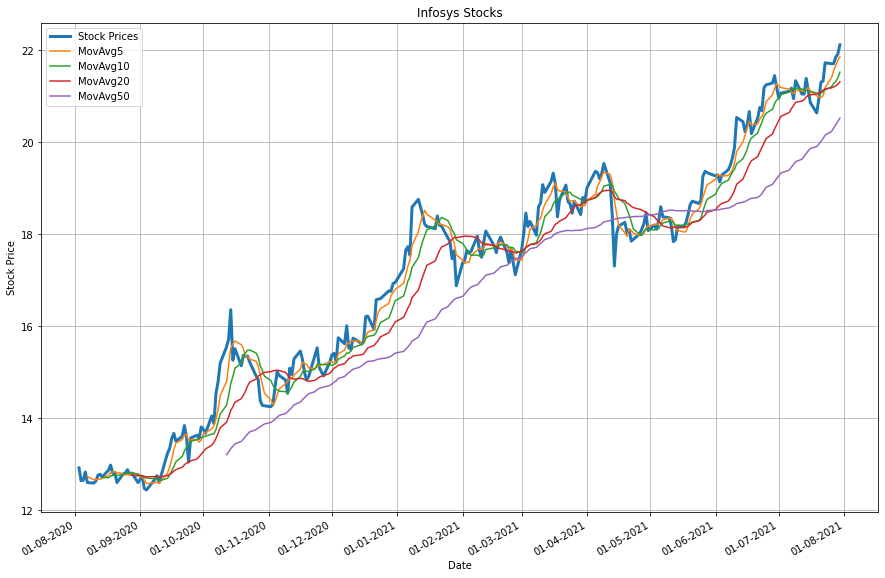

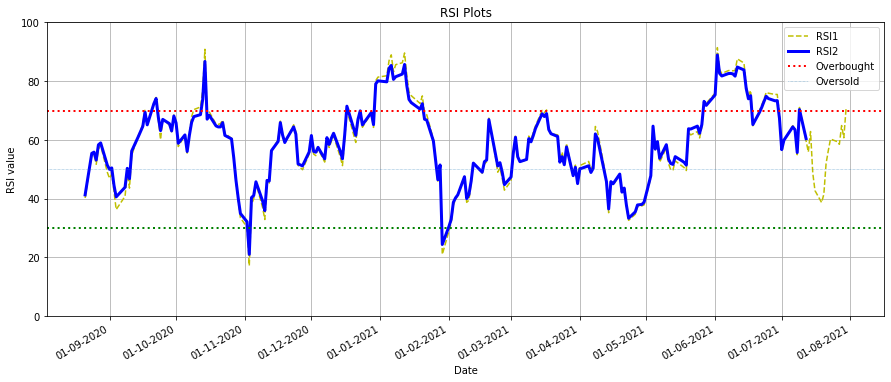

In [15]:
for i in range(len(company)):
    printValue(company[i],1,2,names[i])
    plotting(company[i],names[i],(2*i)+1)
    length = len(company[i])-1
    decision(rsi1(company[i])[0][length],company[i]['MovingAverage5'][length],company[i]['MovingAverage10'][length],company[i]['MovingAverage20'][length],company[i]['MovingAverage50'][length])
    print('\n')